# Titanic - Machine Learning from Disaster

In [1]:
import os
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import pandas_profiling as pp

In [2]:
def EDA(fileName):
    sepLine = "-------------------------------"
    df = pd.read_csv(fileName)
    print("\n\nSHAPE", sepLine,"\n\n")
    print(df.shape)
    print("\n\nINFO", sepLine,"\n\n")
    print(df.info())
    print("\n\nHEAD", sepLine,"\n\n")
    display(df.head())
    print("\n\nDESCRIBE", sepLine,"\n\n")
    print(df.describe())
    print("\n\nCHECK FOR NULLS", sepLine,"\n\n")
    print(df.isnull().sum())
    print(sepLine)
    #train_df[train_df['Age'].isna()]
    #pp.ProfileReport(df, title = ' ', html = {'style':{'full_width': True}})
    return df

In [3]:
def featureEngg(df):
    df["Sex"] = df["Sex"].astype('category')
    df["Embarked"] = df["Embarked"].astype('category')
    df["Title"] = df["Title"].astype('category')
    df["Sex_encoded"] = df["Sex"].cat.codes
    df["Embarked_encoded"] = df["Embarked"].cat.codes
    df["Title_encoded"] = df["Title"].cat.codes
    df.head()

In [4]:
def dropFeatures(df,featureList):
    for feature in featureList:
        df.drop([feature], axis=1, inplace=True)

In [5]:
train_df=EDA('test - Copy.csv')





SHAPE ------------------------------- 


(418, 12)


INFO ------------------------------- 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None


HEAD ------------------------------- 




,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1




DESCRIBE ------------------------------- 


       PassengerId      Pclass         Age       SibSp       Parch  \
count   418.000000  418.000000  332.000000  418.000000  418.000000   
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   
std     120.810458    0.841838   14.181209    0.896760    0.981429   
min     892.000000    1.000000    0.170000    0.000000    0.000000   
25%     996.250000    1.000000   21.000000    0.000000    0.000000   
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   
max    1309.000000    3.000000   76.000000    8.000000    9.000000   

             Fare    Survived  
count  418.000000  418.000000  
mean    35.561214    0.380383  
std     55.856789    0.486063  
min      0.000000    0.000000  
25%      7.895800    0.000000  
50%     14.454200    0.000000  
75%     31.471875    1.000000  
max    512.329200    1.000000  


CHECK FOR NULLS -----------------

In [6]:
train_df['Title'] = train_df['Name'].str.extract('([A-Za-z]+)\.', expand=False)
train_df['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

In [7]:
featureEngg(train_df)

In [8]:
test_df=EDA('test.csv')




SHAPE ------------------------------- 


(418, 11)


INFO ------------------------------- 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


HEAD ------------------------------- 




,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S




DESCRIBE ------------------------------- 


       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  418.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.561214
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.856789
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.471875
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


CHECK FOR NULLS ------------------------------- 


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327


In [9]:
test_df['Title'] = train_df['Name'].str.extract('([A-Za-z]+)\.', expand=False)
test_df['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

In [10]:
train_df["Age"].fillna(train_df.groupby("Title")["Age"].transform("max"), inplace=True)
train_df["Age"].fillna(train_df["Age"].median(), inplace=True)
test_df["Age"].fillna(train_df.groupby("Title")["Age"].transform("max"), inplace=True)
test_df["Age"].fillna(test_df["Age"].median(), inplace=True)

In [11]:
featureEngg(test_df)

In [12]:
train_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title,Sex_encoded,Embarked_encoded,Title_encoded
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,Mr,1,1,5
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,Mrs,0,2,6
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,Mr,1,1,5
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,Mr,1,2,5
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,Mrs,0,2,6


In [13]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Sex_encoded,Embarked_encoded,Title_encoded
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,1,1,5
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,0,2,6
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,1,1,5
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,1,2,5
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,0,2,6


df = pd.read_csv('train.csv')

In [14]:
train_df[train_df['Age'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title,Sex_encoded,Embarked_encoded,Title_encoded


display(df)

pp.ProfileReport(train_df, title = 'Pandas Profiling report of "Train" set', html = {'style':{'full_width': True}})

pp.ProfileReport(test_df, title = 'Pandas Profiling report of "Test" set', html = {'style':{'full_width': True}})

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

df["Sex"] = df["Sex"].astype('category')
df["Embarked"] = df["Embarked"].astype('category')
df["Sex_encoded"] = df["Sex"].cat.codes
df["Embarked_encoded"] = df["Embarked"].cat.codes

df.head()

correl=df.corr()

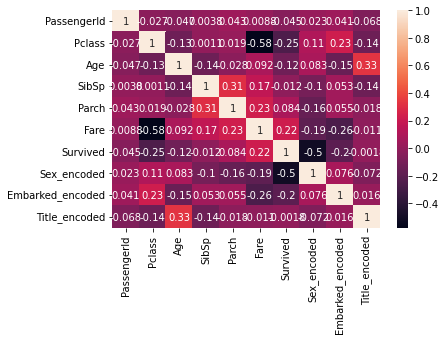

In [16]:
import seaborn as sns

sns.heatmap(train_df.corr(),annot=True)

plt.show()

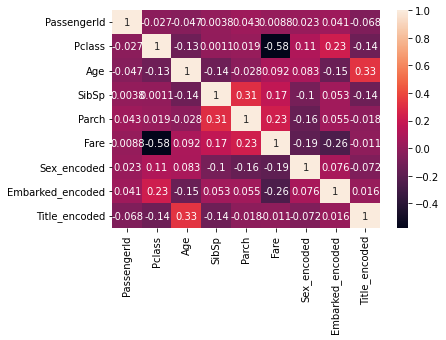

In [17]:
sns.heatmap(test_df.corr(),annot=True)

plt.show()

In [18]:
dropList=['Name','Ticket','Cabin','Sex','Embarked','Title']
dropFeatures(train_df,dropList)
dropFeatures(test_df,dropList)
#train_df = train_df.dropna(subset=['Fare'])
#test_df = test_df.dropna(subset=['Fare'])

In [19]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
#X_test  = test_df.drop("PassengerId", axis=1).copy()

In [20]:
'''
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)


from sklearn.svm import SVC
classifier = SVC(C=2.0,kernel = 'linear', random_state = 0)
#,class_weight='balanced',decision_function_shape='ovr')
classifier.fit(X_train, Y_train)


from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, algorithm='ball_tree',metric = 'minkowski', p = 1)
classifier.fit(X_train, Y_train)

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
'''
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
'''
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, Y_train)
'''


"\nfrom sklearn.tree import DecisionTreeClassifier\nclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)\nclassifier.fit(X_train, Y_train)\n\nfrom sklearn.linear_model import LogisticRegression\nclassifier = LogisticRegression(random_state = 0)\nclassifier.fit(X_train, Y_train)\n\nfrom xgboost import XGBClassifier\nclassifier = XGBClassifier()\nclassifier.fit(X_train, Y_train)\n"

In [21]:
Y_pred = classifier.predict(test_df)

In [22]:
from sklearn.metrics import accuracy_score
classifier.score(X_train, Y_train)
classifier = round(classifier.score(X_train, Y_train) * 100, 2)
classifier

100.0

In [23]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })

In [24]:
submission.to_csv('submission.csv', index=False)

y=train_data['Survived'].values
y.shape

train_data=train_data.drop(['Survived'], axis=1)
concated_data=pd.concat([train_data,test_data],ignore_index=True)
print(concated_data)

X=concated_data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Relatives']].values
print(X[0:5,:])

In [25]:
''' 
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, Y_train)

'''

" \nfrom sklearn.svm import SVC\nclassifier = SVC(kernel = 'linear', random_state = 0)\nclassifier.fit(X_train, Y_train)\n\nfrom sklearn.neighbors import KNeighborsClassifier\nclassifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)\nclassifier.fit(X_train, Y_train)\n\nfrom sklearn.naive_bayes import GaussianNB\nclassifier = GaussianNB()\nclassifier.fit(X_train, Y_train)\n\nfrom sklearn.ensemble import RandomForestClassifier\nclassifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)\nclassifier.fit(X_train, y_train)\n\nfrom sklearn.tree import DecisionTreeClassifier\nclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)\nclassifier.fit(X_train, y_train)\n\nfrom sklearn.linear_model import LogisticRegression\nclassifier = LogisticRegression(random_state = 0)\nclassifier.fit(X_train, Y_train)\n\nfrom xgboost import XGBClassifier\nclassifier = XGBClassifier()\nclassifier.fit(X_train, Y_train)\n\n"

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

submission = pd.DataFrame({
        "PassengerId": test_data_org["PassengerId"],
        "Survived": y_pred_TD_SVM
    })
submission.to_csv('submission.csv', index=False)